<a href="https://colab.research.google.com/github/hemxnth19/MachineLearning/blob/main/Lab4_Assignment_21210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [301]:
import numpy as np
import pandas as pd
import math
from collections import Counter

# **A1 : For the data table provided below, calculate the entropy associated with each attribute / feature at the root node. Using this information, identify the first feature that you’d select for constructing the decision tree. Use Information Gain as the impurity measure to identify the root node.‘buys_computer’ is the class label.**

In [302]:
# Creating dataframe

dataset = {'age' : ['<=30','<=30','31...40','>40','>40','>40','31...40','<=30','<=30','>40','<=30','31...40','31...40','>40'],
          'income' : ['high','high','high','medium','low','low','low','medium','low','medium','medium','medium','high','medium'],
          'student' : ['no','no','no','no','yes','yes','yes','no','yes','yes','yes','no','yes','no'],
          'credit_rating' : ['fair','excellent','fair','fair','fair','excellent','excellent','fair','fair','fair','excellent','excellent','fair','excellent'],
          'buys_computer' : ['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']}

df = pd.DataFrame(dataset)
df

age  income student credit_rating buys_computer
0      <=30    high      no          fair            no
1      <=30    high      no     excellent            no
2   31...40    high      no          fair           yes
3       >40  medium      no          fair           yes
4       >40     low     yes          fair           yes
5       >40     low     yes     excellent            no
6   31...40     low     yes     excellent           yes
7      <=30  medium      no          fair            no
8      <=30     low     yes          fair           yes
9       >40  medium     yes          fair           yes
10     <=30  medium     yes     excellent           yes
11  31...40  medium      no     excellent           yes
12  31...40    high     yes          fair           yes
13      >40  medium      no     excellent            no

In [321]:
# Function to calculate entropy
def entropy(data):
    n = len(data)
    label_counts = Counter(data)
    entropy = 0
    for label in label_counts:
        prob = label_counts[label] / n
        entropy -= prob * math.log2(prob)
    return entropy


# Calculate entropy of target variable (buys_computer)
target_entropy = entropy(df['buys_computer'])
print(f'Entropy : {target_entropy}')

# Define a function to calculate conditional entropy
def conditional_entropy(feature, target):
    feature_value_counts = Counter(feature)
    conditional_entropy = 0
    for value, count in feature_value_counts.items():
        prob = count / len(feature)
        subset_target = [target[i] for i in range(len(target)) if feature[i] == value]
        conditional_entropy += prob * entropy(subset_target)
    return conditional_entropy


# Calculate information gain for each feature

age_gain = target_entropy - conditional_entropy(df['age'], df['buys_computer'])
income_gain = target_entropy - conditional_entropy(df['income'], df['buys_computer'])
student_gain = target_entropy - conditional_entropy(df['student'], df['buys_computer'])
credit_rating_gain = target_entropy - conditional_entropy(df['credit_rating'], df['buys_computer'])

# Print information gains
print(f'Age Information Gain: {age_gain}')
print(f'Income Information Gain: {income_gain}')
print(f'Student Information Gain: {student_gain}')
print(f'Credit Rating Information Gain: {credit_rating_gain}')

Entropy : 0.9402859586706311
Age Information Gain: 0.24674981977443933
Income Information Gain: 0.02922256565895487
Student Information Gain: 0.15183550136234159
Credit Rating Information Gain: 0.04812703040826949


# **A2 :  Create a Decision Tree for the above data. Get the depth of the constructed tree.**

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [305]:
# Encode categorical variables to numerical values

le = LabelEncoder()
for column in df.columns:
  df[column] = le.fit_transform(df[column])
df

age  income  student  credit_rating  buys_computer
0     1       0        0              1              0
1     1       0        0              0              0
2     0       0        0              1              1
3     2       2        0              1              1
4     2       1        1              1              1
5     2       1        1              0              0
6     0       1        1              0              1
7     1       2        0              1              0
8     1       1        1              1              1
9     2       2        1              1              1
10    1       2        1              0              1
11    0       2        0              0              1
12    0       0        1              1              1
13    2       2        0              0              0

In [306]:
def Decision_Tree_Model(data):

    # Define features and target
    X=data.iloc[:,:-1].values
    y=data.iloc[:,-1].values

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create a decision tree classifier
    dtc = DecisionTreeClassifier()  # Criterion : Default

    # Fit the classifier to the training data
    dtc.fit(X_train, y_train)

    # Visualize the constructed tree with plot_tree() command
    plt.figure(figsize=(90,40))
    plot_tree(dtc, filled=True)
    plt.show()

    # Print the tree depth
    print(f"Tree Depth :{dtc.get_depth()}")


    # Accuracy on the train data
    accuracy = dtc.score(X_train, y_train)
    percentage =  accuracy * 100
    print( f"Accuracy on the train data : {percentage} % ")


    # Accuracy on the test data
    accuracy = dtc.score(X_test, y_test)
    percentage =  accuracy * 100
    print( f"Accuracy on the test data : {percentage} % ")


# **A3. Visualize the constructed tree with plot_tree() command. Following code snippet for help.**

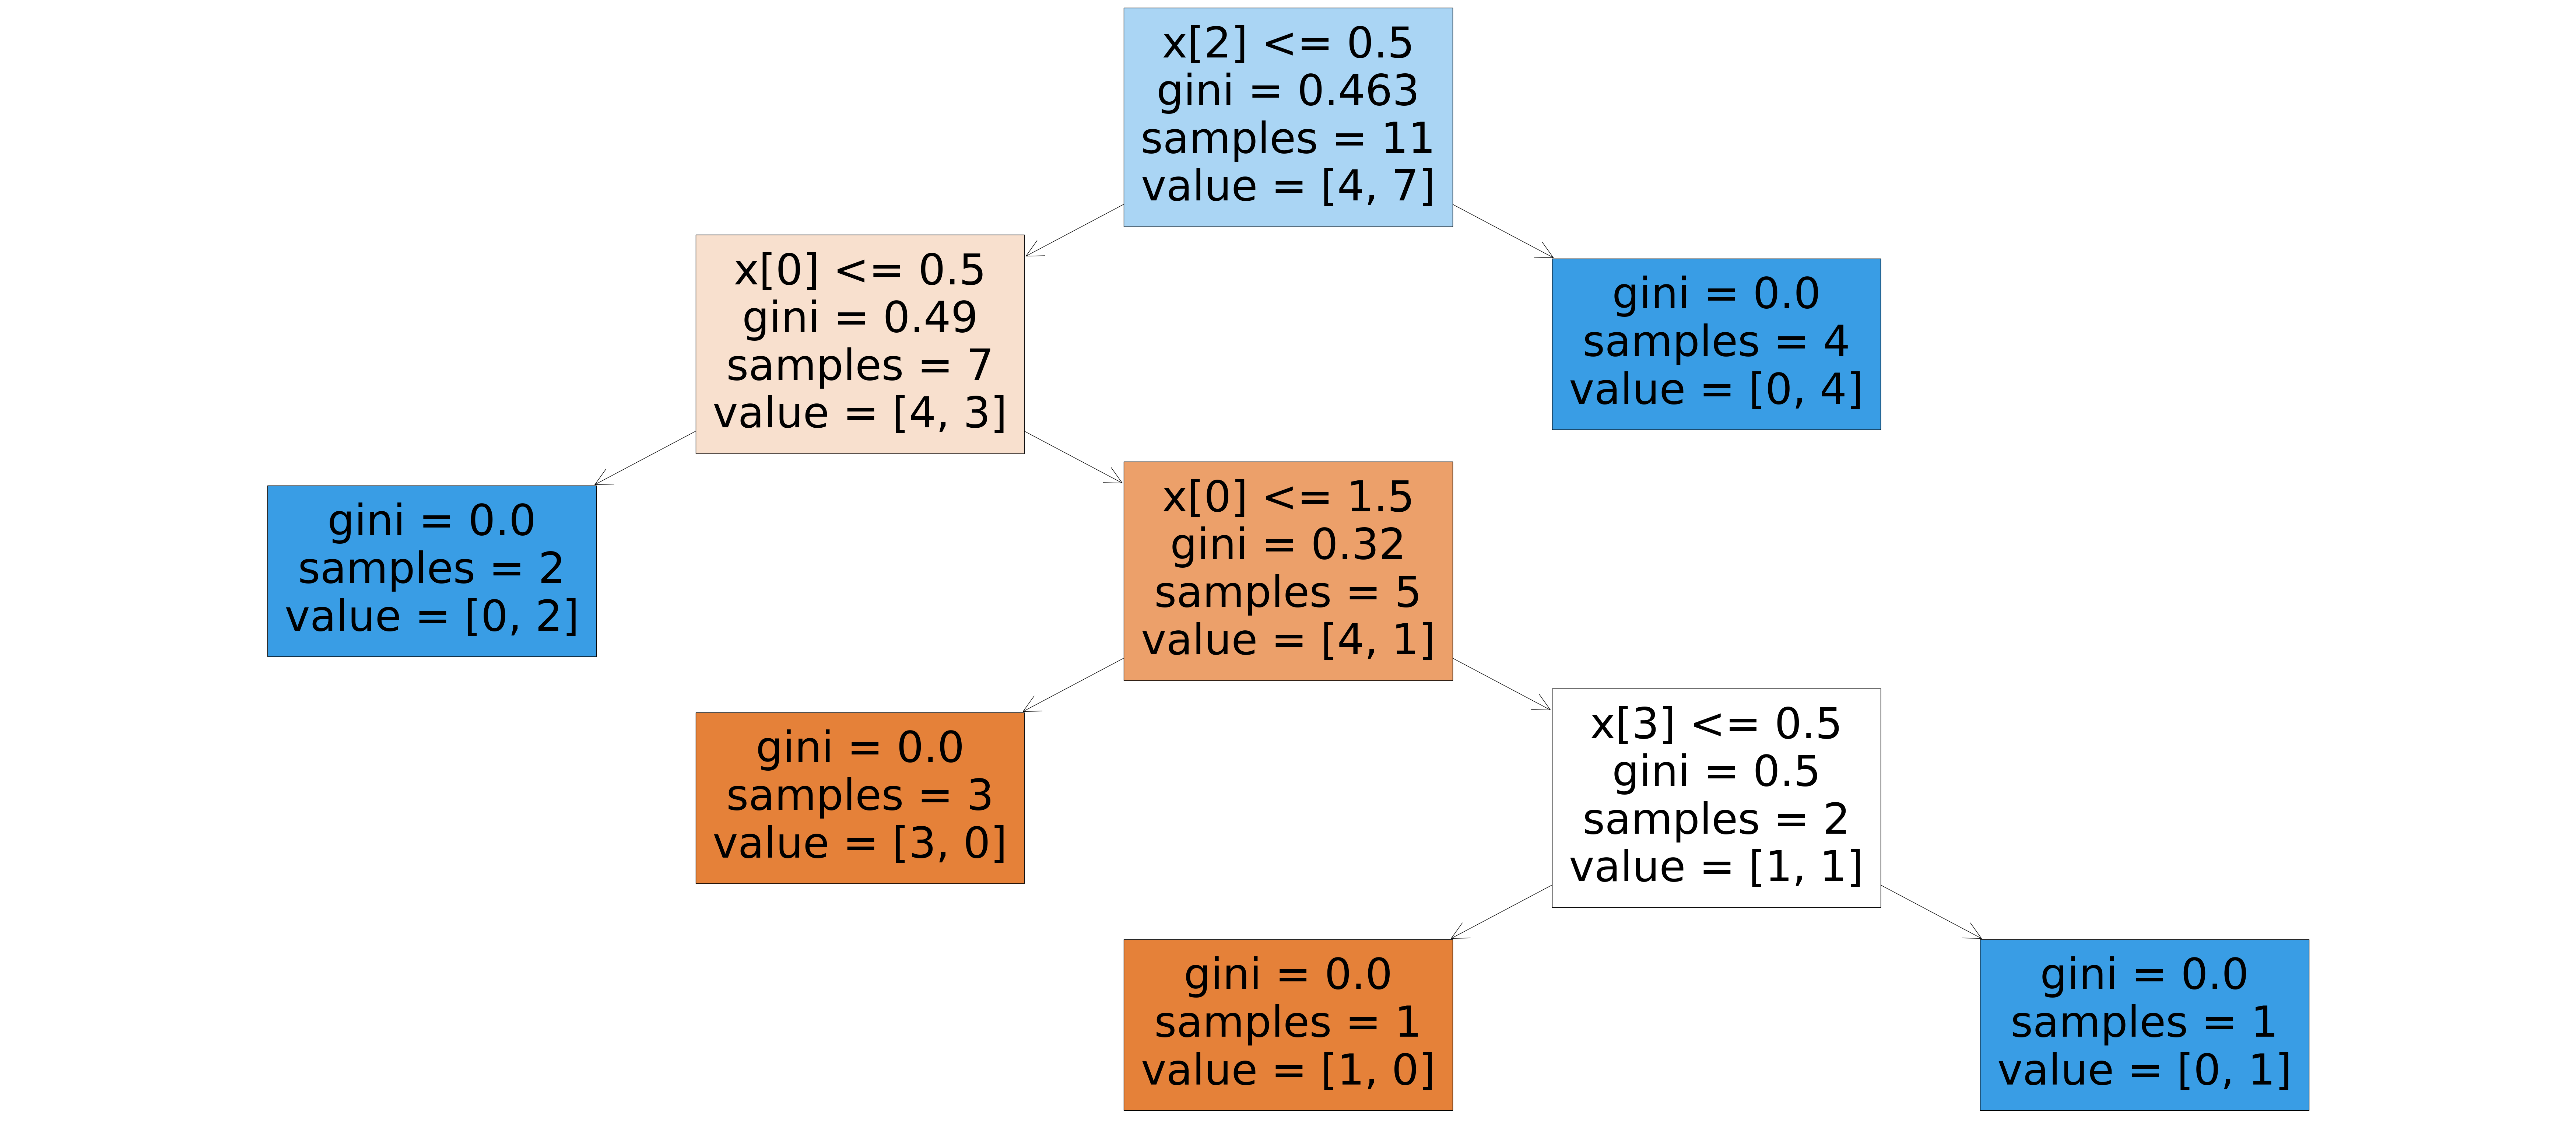

Tree Depth :4
Accuracy on the train data : 100.0 % 
Accuracy on the test data : 66.66666666666666 % 


In [328]:
Decision_Tree_Model(df)

# **A4 : Create a Decision Tree classifier on your project data. Study the accuracy for training and test data and infer the accuracy of tree construction. Plot the Decision Tree obtained above. Below code forhelp.**

In [308]:
df1 = pd.read_excel("/content/drive/MyDrive/Machine Learning /EndSem_Project/Sentiment_analysis_embedding_data.xlsx")
df1

embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0    0.009625 -0.029216  0.027109  0.023631 -0.004972  0.031757 -0.045125   
1   -0.007535 -0.039844  0.030167  0.031224  0.004742  0.028289 -0.068723   
2    0.022408 -0.030840  0.032328  0.046965  0.007798  0.025860 -0.065093   
3    0.019677 -0.034055  0.012662  0.070387 -0.011170  0.017842 -0.050945   
4    0.017678 -0.030323  0.012829  0.065267 -0.025161  0.011964 -0.050590   
..        ...       ...       ...       ...       ...       ...       ...   
895  0.019743 -0.071799  0.022546  0.049042 -0.005767 -0.016275 -0.037731   
896  0.000186 -0.027604  0.010623  0.038237 -0.026675  0.020215 -0.040816   
897  0.018066 -0.032152  0.039794  0.047608  0.003898  0.024092 -0.056508   
898 -0.003492 -0.022739  0.021777  0.044054 -0.005621  0.013863 -0.079196   
899  0.013689 -0.037855  0.039763  0.035750  0.004115  0.005637 -0.050556   

      embed_7   embed_8   embed_9  ...  embed_758  embed_759  embed_760  \
0    0.044483  0.019400 -0.017189  ...  -0.045697  -0.001972  -0.008154   
1    0.039153  0.019596 -0.027138  ...  -0.056834   0.008613  -0.006578   
2    0.035118  0.035359 -0.029205  ...  -0.016249   0.020413  -0.034288   
3    0.044878  0.034781 -0.025772  ...  -0.038879   0.002963  -0.018754   
4    0.042820  0.029161 -0.015004  ...  -0.042079   0.010192  -0.010147   
..        ...       ...       ...  ...        ...        ...        ...   
895  0.029718  0.009203 -0.030913  ...  -0.040456  -0.001192  -0.026138   
896  0.032210  0.041016 -0.014836  ...  -0.026985   0.015479  -0.003967   
897  0.020527  0.031972 -0.026038  ...  -0.041547   0.011308  -0.016882   
898  0.039150  0.004557 -0.015787  ...  -0.057920   0.004005  -0.007196   
899  0.024668  0.025077 -0.029114  ...  -0.039500  -0.000129  -0.003880   

     embed_761  embed_762  embed_763  embed_764  embed_765  embed_766  \
0    -0.056139   0.009890   0.042366   0.040134   0.009304  -0.016137   
1    -0.034220   0.027574   0.045456   0.027402   0.017837  -0.035009   
2    -0.050649   0.028408   0.040412   0.030261   0.003535  -0.034122   
3    -0.053278   0.033005   0.031635   0.022544  -0.011774  -0.011125   
4    -0.035857   0.021784   0.034621   0.017342  -0.009884  -0.010316   
..         ...        ...        ...        ...        ...        ...   
895  -0.056447   0.015818   0.045241   0.012620  -0.004837  -0.014540   
896  -0.037808   0.021234   0.031012  -0.010890   0.003081  -0.015145   
897  -0.059904   0.009558   0.039976   0.029574   0.013737  -0.003724   
898  -0.041652   0.020945   0.047604   0.019767   0.005806  -0.019280   
899  -0.048696   0.015711   0.039773   0.036328   0.010483  -0.021304   

     embed_767  
0    -0.009309  
1    -0.010062  
2    -0.017289  
3    -0.017540  
4    -0.029238  
..         ...  
895  -0.046791  
896  -0.045444  
897  -0.017324  
898  -0.016415  
899  -0.032017  

[900 rows x 768 columns]

In [309]:
df2 = pd.read_excel("/content/drive/MyDrive/Machine Learning /EndSem_Project/Sentiment_analysis_of_legal_texts.xlsx")
df2

Id                                           Judgment  \
0      1  "1. Being aggrieved by the judgment delivered ...   
1      2  "This was an appeal from a judgment and decree...   
2      3  "This was an application under article 32 (1) ...   
3      4  "APPEAL from a judgment of the High Court of H...   
4      5  "APPEAL under article 374(4) of the Constituti...   
..   ...                                                ...   
895  896  documents in column 3 thereof. The petitioner ...   
896  897  for such unauthorised construction before the ...   
897  898  Mr. Jayanta Kr. Mitra, Sr. Advocate with Mr. R...   
898  899  Considering the averments contained in the app...   
899  900  The Court: By order dated 26th July, 2013, an ...   

                                       Lawyers Summary  \
0     "The appeal was filed by a co-operative socie...   
1     A complaint has been lodged against you, unde...   
2     Appeal comes under article 374 (4) of the Con...   
3    The appeal was presented to the Judicial Commi...   
4    The appeal was presented to the Judicial Commi...   
..                                                 ...   
895                                                      
896                                                      
897                                                      
898                                                      
899                                                      

                                        Golden summary             Domain  \
0    "The appellant, a cooperative society, filed a...              Civil   
1    "The appellants were members of the East India...              Civil   
2    "Petitioner Rashid Ahmed is running a wholesal...              Civil   
3    "The decree-holder made an application in revi...              Civil   
4     "An application was made for the execution of...              Civil   
..                                                 ...                ...   
895                                                                  Writ   
896                                                                 Civil   
897                                                                  Writ   
898                                                     Revision Petition   
899                                                                  Writ   

      Judgment Status             Equivalent Citation  \
0    Appeal dismissed   CIVIL APPEAL NO. 3880 OF 2003   
1    Appeal dismissed         1950 AIR, 7 1950 SCR 64   
2    Petition allowed      1950 AIR 163, 1950 SCR 566   
3      Appeal allowed      1953 AIR 413, 1950 SCR 747   
4      Appeal allowed      1950 AIR 274, 1950 SCR 741   
..                ...                             ...   
895               NaN                             NaN   
896               NaN                             NaN   
897               NaN                             NaN   
898               NaN                             NaN   
899               NaN                             NaN   

                                                  Name           Court name  \
0    Rajasthan R.S.S. & Ginning Mills Fed.Ltd Vs. D...        Supreme Court   
1    Messrs. Khimji Poonja And Company vs Shri Bald...        Supreme Court   
2    Rashid Ahmed vs The Municipal Board, Kairana.T...        Supreme Court   
3    Supreme Court Of India ... vs Kadar Unnisa Beg...        Supreme Court   
4     Supreme Court Of India ... vs Nandlal on 12 O...        Supreme Court   
..                                                 ...                  ...   
895                                                NaN  Calcutta High Court   
896                                                NaN  Calcutta High Court   
897                                                NaN  Calcutta High Court   
898                                                NaN  Calcutta High Court   
899                                                NaN  Calcutta High Cou

In [310]:
df1['Score'] = df2['Label']
df1

embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0    0.009625 -0.029216  0.027109  0.023631 -0.004972  0.031757 -0.045125   
1   -0.007535 -0.039844  0.030167  0.031224  0.004742  0.028289 -0.068723   
2    0.022408 -0.030840  0.032328  0.046965  0.007798  0.025860 -0.065093   
3    0.019677 -0.034055  0.012662  0.070387 -0.011170  0.017842 -0.050945   
4    0.017678 -0.030323  0.012829  0.065267 -0.025161  0.011964 -0.050590   
..        ...       ...       ...       ...       ...       ...       ...   
895  0.019743 -0.071799  0.022546  0.049042 -0.005767 -0.016275 -0.037731   
896  0.000186 -0.027604  0.010623  0.038237 -0.026675  0.020215 -0.040816   
897  0.018066 -0.032152  0.039794  0.047608  0.003898  0.024092 -0.056508   
898 -0.003492 -0.022739  0.021777  0.044054 -0.005621  0.013863 -0.079196   
899  0.013689 -0.037855  0.039763  0.035750  0.004115  0.005637 -0.050556   

      embed_7   embed_8   embed_9  ...  embed_759  embed_760  embed_761  \
0    0.044483  0.019400 -0.017189  ...  -0.001972  -0.008154  -0.056139   
1    0.039153  0.019596 -0.027138  ...   0.008613  -0.006578  -0.034220   
2    0.035118  0.035359 -0.029205  ...   0.020413  -0.034288  -0.050649   
3    0.044878  0.034781 -0.025772  ...   0.002963  -0.018754  -0.053278   
4    0.042820  0.029161 -0.015004  ...   0.010192  -0.010147  -0.035857   
..        ...       ...       ...  ...        ...        ...        ...   
895  0.029718  0.009203 -0.030913  ...  -0.001192  -0.026138  -0.056447   
896  0.032210  0.041016 -0.014836  ...   0.015479  -0.003967  -0.037808   
897  0.020527  0.031972 -0.026038  ...   0.011308  -0.016882  -0.059904   
898  0.039150  0.004557 -0.015787  ...   0.004005  -0.007196  -0.041652   
899  0.024668  0.025077 -0.029114  ...  -0.000129  -0.003880  -0.048696   

     embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  Score  
0     0.009890   0.042366   0.040134   0.009304  -0.016137  -0.009309      0  
1     0.027574   0.045456   0.027402   0.017837  -0.035009  -0.010062      0  
2     0.028408   0.040412   0.030261   0.003535  -0.034122  -0.017289      0  
3     0.033005   0.031635   0.022544  -0.011774  -0.011125  -0.017540      0  
4     0.021784   0.034621   0.017342  -0.009884  -0.010316  -0.029238      0  
..         ...        ...        ...        ...        ...        ...    ...  
895   0.015818   0.045241   0.012620  -0.004837  -0.014540  -0.046791      2  
896   0.021234   0.031012  -0.010890   0.003081  -0.015145  -0.045444      0  
897   0.009558   0.039976   0.029574   0.013737  -0.003724  -0.017324      2  
898   0.020945   0.047604   0.019767   0.005806  -0.019280  -0.016415      5  
899   0.015711   0.039773   0.036328   0.010483  -0.021304  -0.032017      2  

[900 rows x 769 columns]

In [311]:
# Threshold to segregate into 2 classes (range[0,1] as 0 and range[2,10] as 1)
threshold = 5

# Replace values in 'Score' with the threshold
df1['Score'] = np.where(df1['Score'] >= threshold, 1, 0)

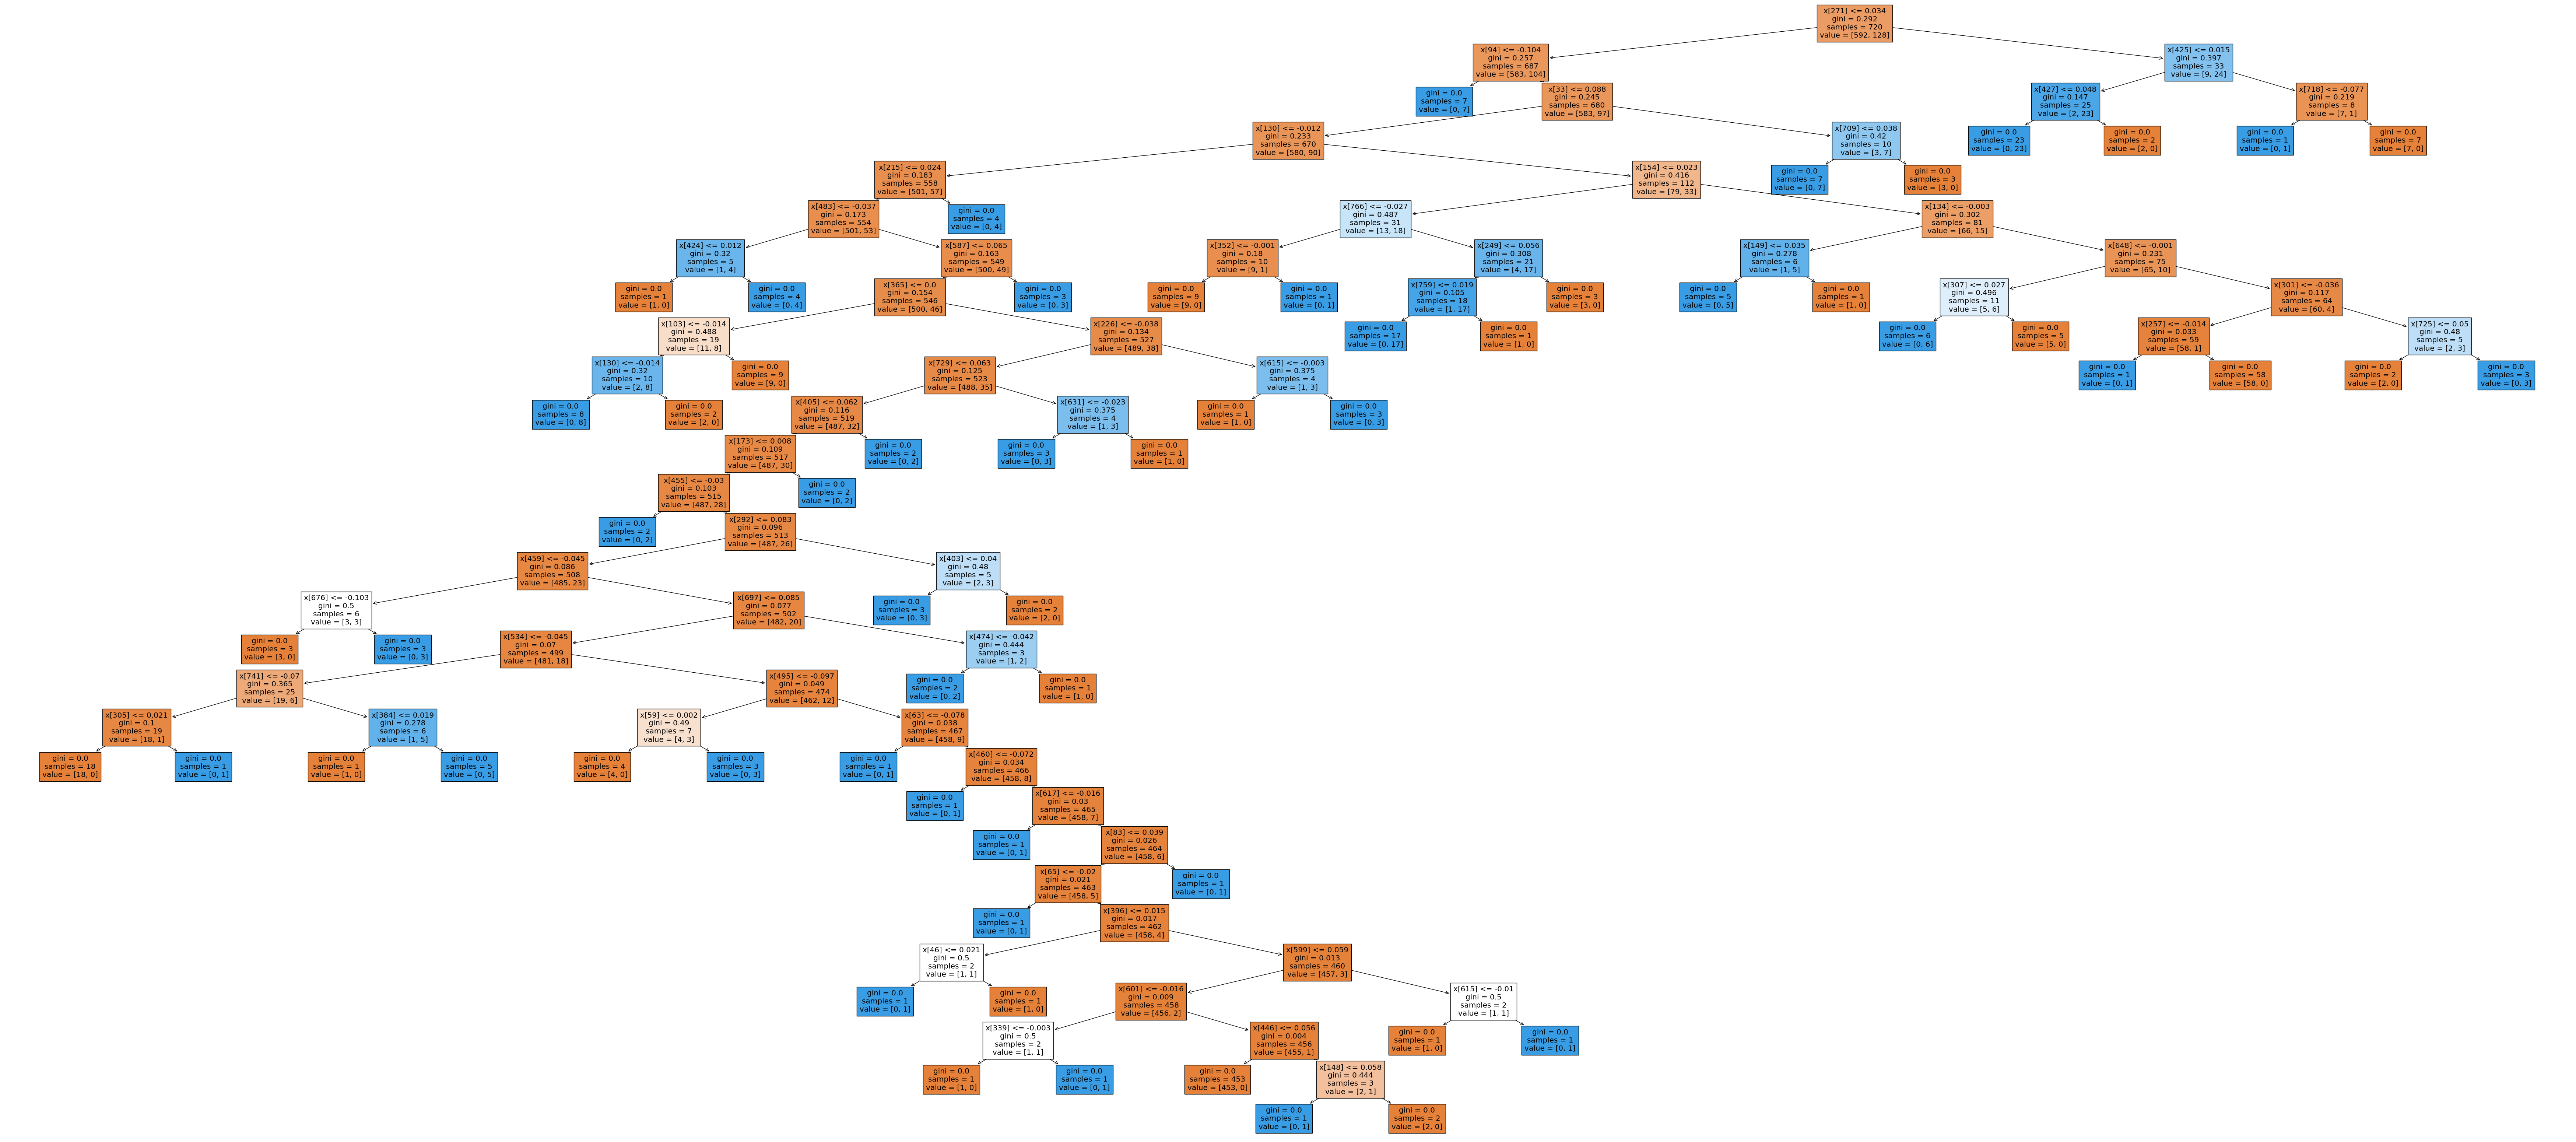

Tree Depth :28
Accuracy on the train data : 100.0 % 
Accuracy on the test data : 73.33333333333333 % 


In [312]:
Decision_Tree_Model(df1)

# **A5 : Impose a max_depth constraint on the tree construction.Construct the tree again and check the accuracies. Visualize the tree constructed with max_depth constraint.**

In [313]:
def Decision_Tree_Model_MaxDepth(data):

    # Define features and target
    X=data.iloc[:,:-1].values
    y=data.iloc[:,-1].values

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create a decision tree classifier
    dtc = DecisionTreeClassifier(max_depth=5)  # max_depth=5

    # Fit the classifier to the training data
    dtc.fit(X_train, y_train)

    # Visualize the constructed tree with plot_tree() command
    plt.figure(figsize=(90,40))
    plot_tree(dtc, filled=True)
    plt.show()

    # Print the tree depth
    print(f"Tree Depth :{dtc.get_depth()}")

    # Accuracy on the train data
    accuracy = dtc.score(X_train, y_train)
    percentage =  accuracy * 100
    print( f"Accuracy on the train data : {percentage} % ")


    # Accuracy on the test data
    accuracy = dtc.score(X_test, y_test)
    percentage =  accuracy * 100
    print( f"Accuracy on the test data : {percentage} % ")

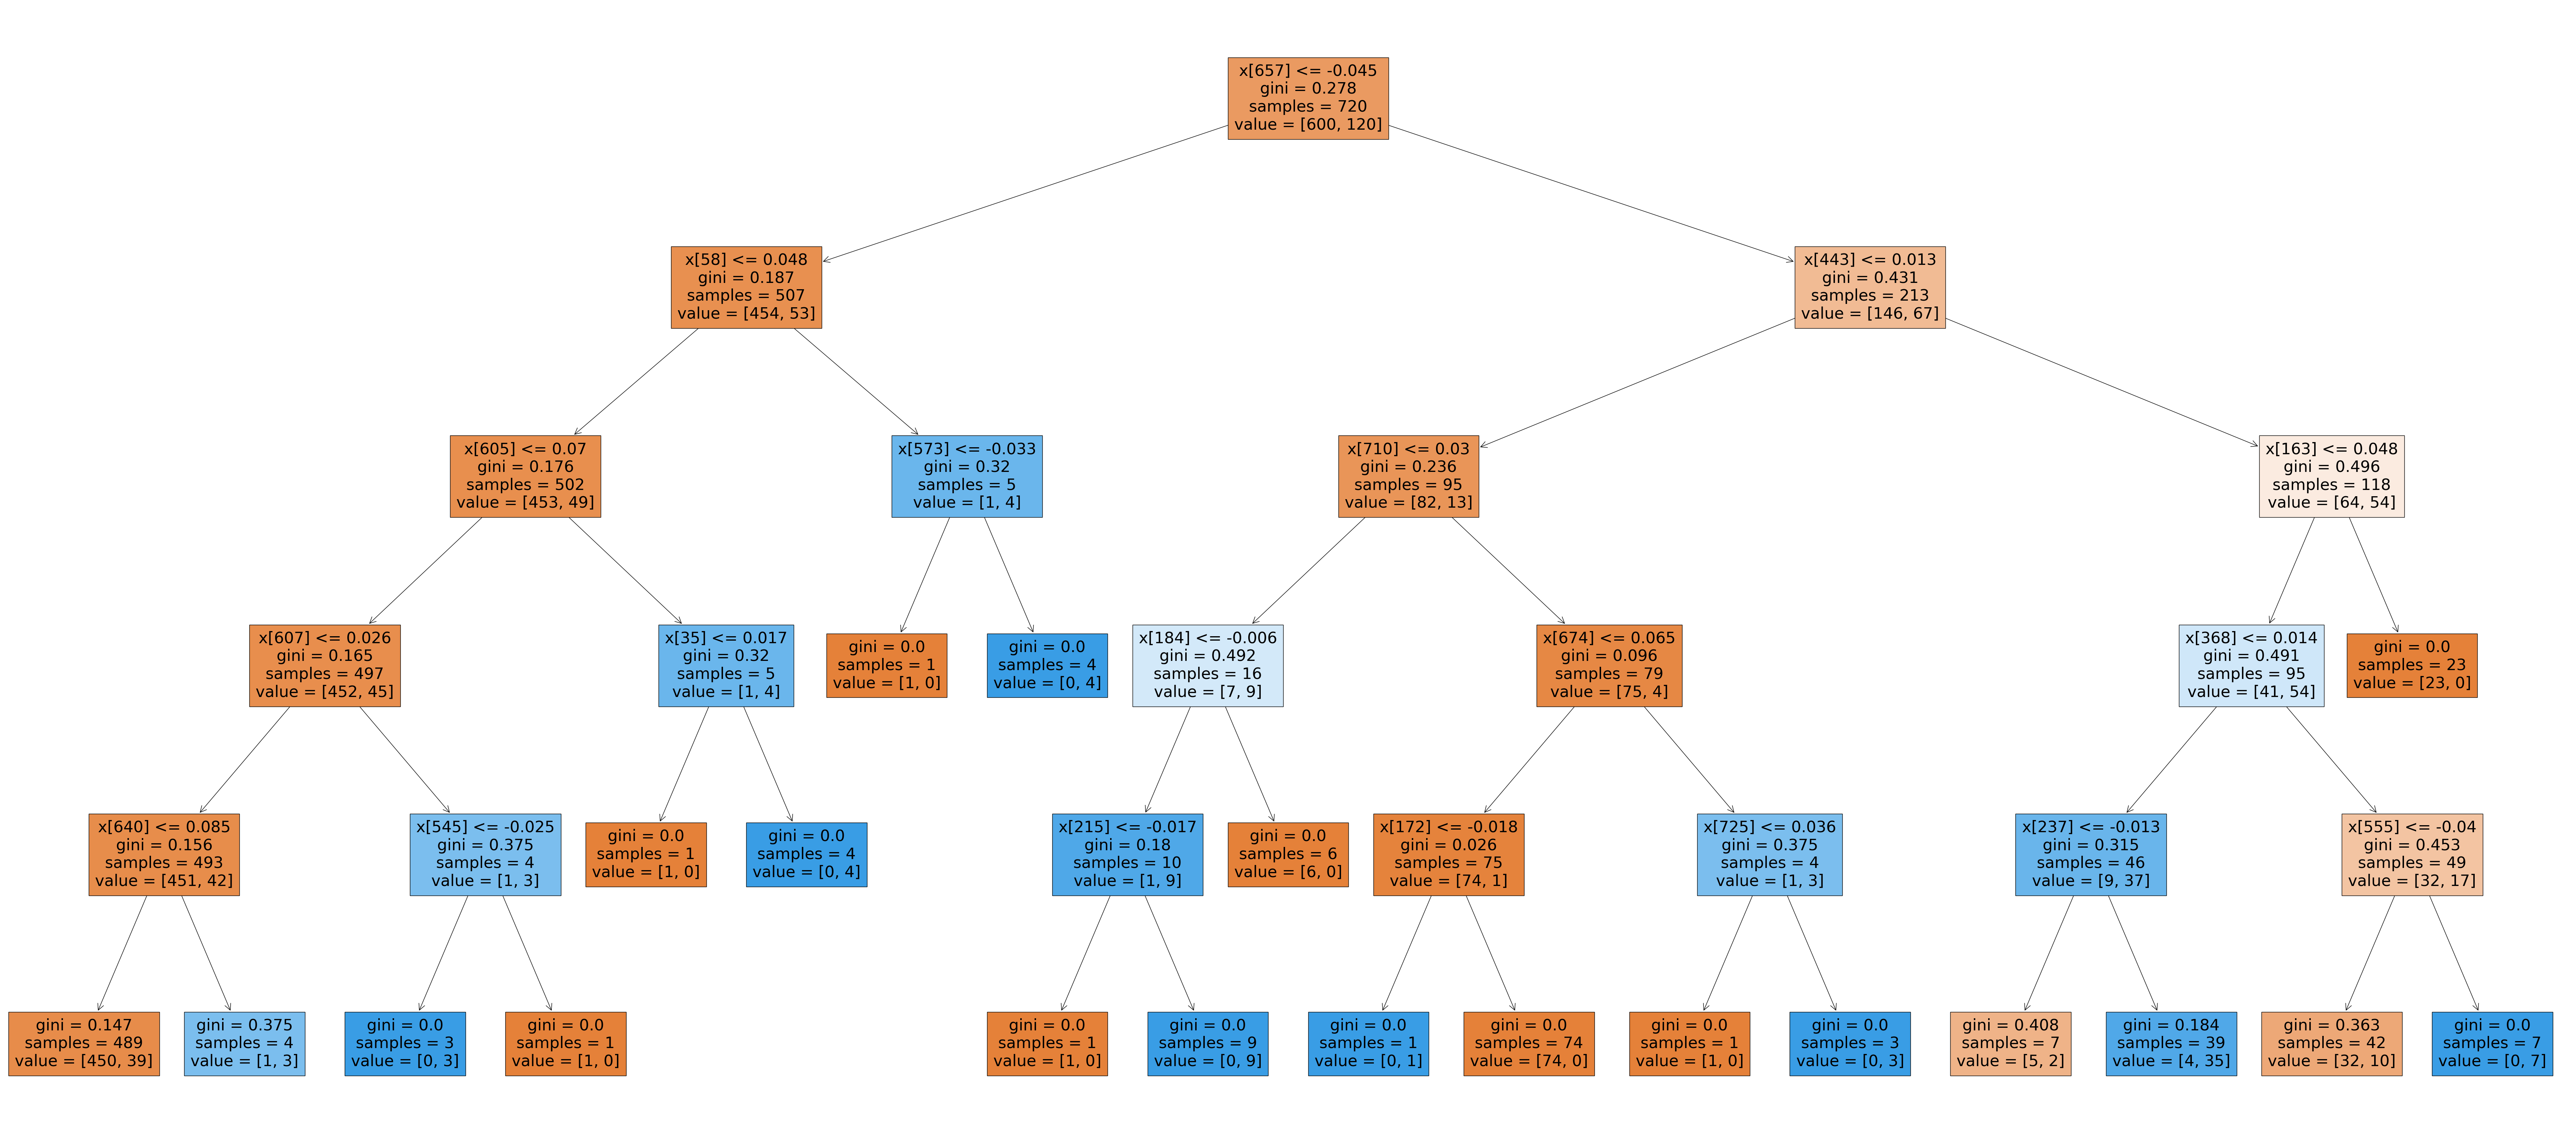

Tree Depth :5
Accuracy on the train data : 92.22222222222223 % 
Accuracy on the test data : 75.0 % 


In [314]:
Decision_Tree_Model_MaxDepth(df1)

# **A6 : Study the criterion of the DT in the above model. Change the criterion to “Entropy” and study the model & graph. Find the differences between the default criterion and entropy criterion. Refer code below for criterion.**

In [315]:
def Decision_Tree_Model_entropy(data):

    # Define features and target
    X=data.iloc[:,:-1].values
    y=data.iloc[:,-1].values

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create a decision tree classifier
    dtc = DecisionTreeClassifier(criterion="entropy")  # criterion : entropy

    # Fit the classifier to the training data
    dtc.fit(X_train, y_train)

    # Visualize the constructed tree with plot_tree() command
    plt.figure(figsize=(100,40))
    plot_tree(dtc, filled=True)
    plt.show()

    # Print the tree depth
    print(f"Tree Depth :{dtc.get_depth()}")

    # Prediction
    y_pred = dtc.predict(X_test)

    # Accuracy on the train data
    accuracy = dtc.score(X_train, y_train)
    percentage =  accuracy * 100
    print( f"Accuracy on the train data : {percentage} % ")


    # Accuracy on the test data
    accuracy = dtc.score(X_test, y_test)
    percentage =  accuracy * 100
    print( f"Accuracy on the test data : {percentage} % ")

    # Confusion Matrix
    CM = confusion_matrix(y_test,y_pred)
    print( f"Confusion Matrix : \n{CM}")

    # Classification Report
    CR = classification_report(y_test,y_pred)
    print( f"Accuracy on the train data : \n{CR}")

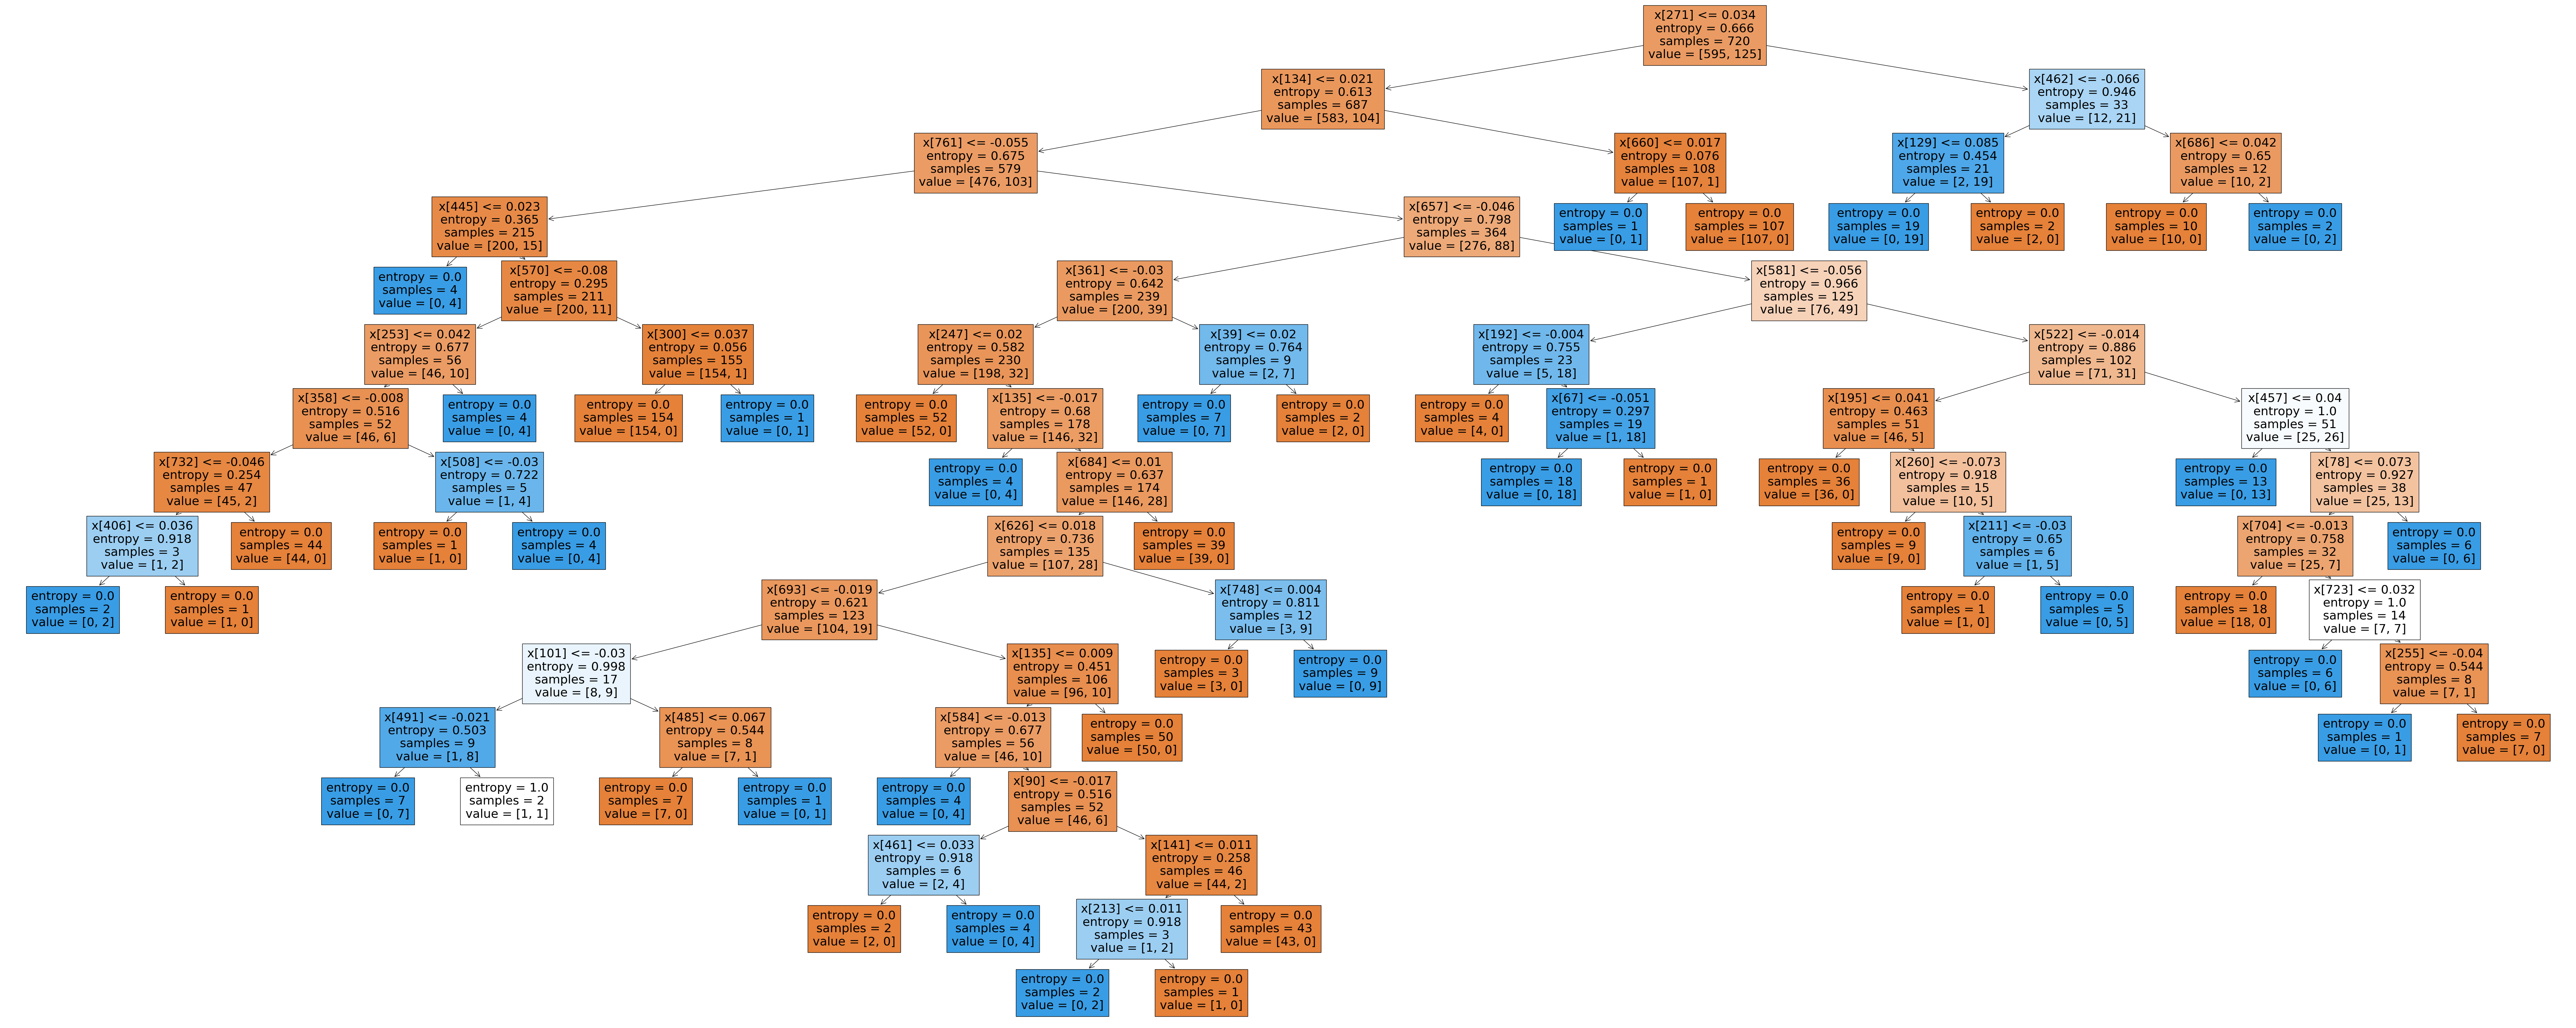

Tree Depth :15
Accuracy on the train data : 99.86111111111111 % 
Accuracy on the test data : 73.88888888888889 % 
Confusion Matrix : 
[[123  28]
 [ 19  10]]
Accuracy on the train data : 
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       151
           1       0.26      0.34      0.30        29

    accuracy                           0.74       180
   macro avg       0.56      0.58      0.57       180
weighted avg       0.77      0.74      0.75       180



In [316]:
Decision_Tree_Model_entropy(df1)

# **A7. Construct a random forest classifier on your project data. Find the differences between the decision tree & random forest classifiers with the help of the performance metrics.**

In [317]:
from sklearn.ensemble import RandomForestClassifier

In [318]:
def Random_Forest_Model(data):

    # Define features and target
    X=data.iloc[:,:-1].values
    y=data.iloc[:,-1].values

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Create a random forest classifier
    rfc = RandomForestClassifier()

    # Fit the classifier to the training data
    rfc.fit(X_train, y_train)


    # Prediction
    y_pred = rfc.predict(X_test)

    # Accuracy on the train data
    accuracy = rfc.score(X_train, y_train)
    percentage =  accuracy * 100
    print( f"Accuracy on the train data : {percentage} % ")


    # Accuracy on the test data
    accuracy = rfc.score(X_test, y_test)
    percentage =  accuracy * 100
    print( f"Accuracy on the test data : {percentage} % ")

    # Confusion Matrix
    CM = confusion_matrix(y_test,y_pred)
    print( f"Confusion Matrix : \n{CM}")

    # Classification Report
    CR = classification_report(y_test,y_pred)
    print( f"Accuracy on the train data : \n{CR}")

In [319]:
Random_Forest_Model(df1)

Accuracy on the train data : 99.86111111111111 % 
Accuracy on the test data : 82.77777777777777 % 
Confusion Matrix : 
[[147   0]
 [ 31   2]]
Accuracy on the train data : 
              precision    recall  f1-score   support

           0       0.83      1.00      0.90       147
           1       1.00      0.06      0.11        33

    accuracy                           0.83       180
   macro avg       0.91      0.53      0.51       180
weighted avg       0.86      0.83      0.76       180



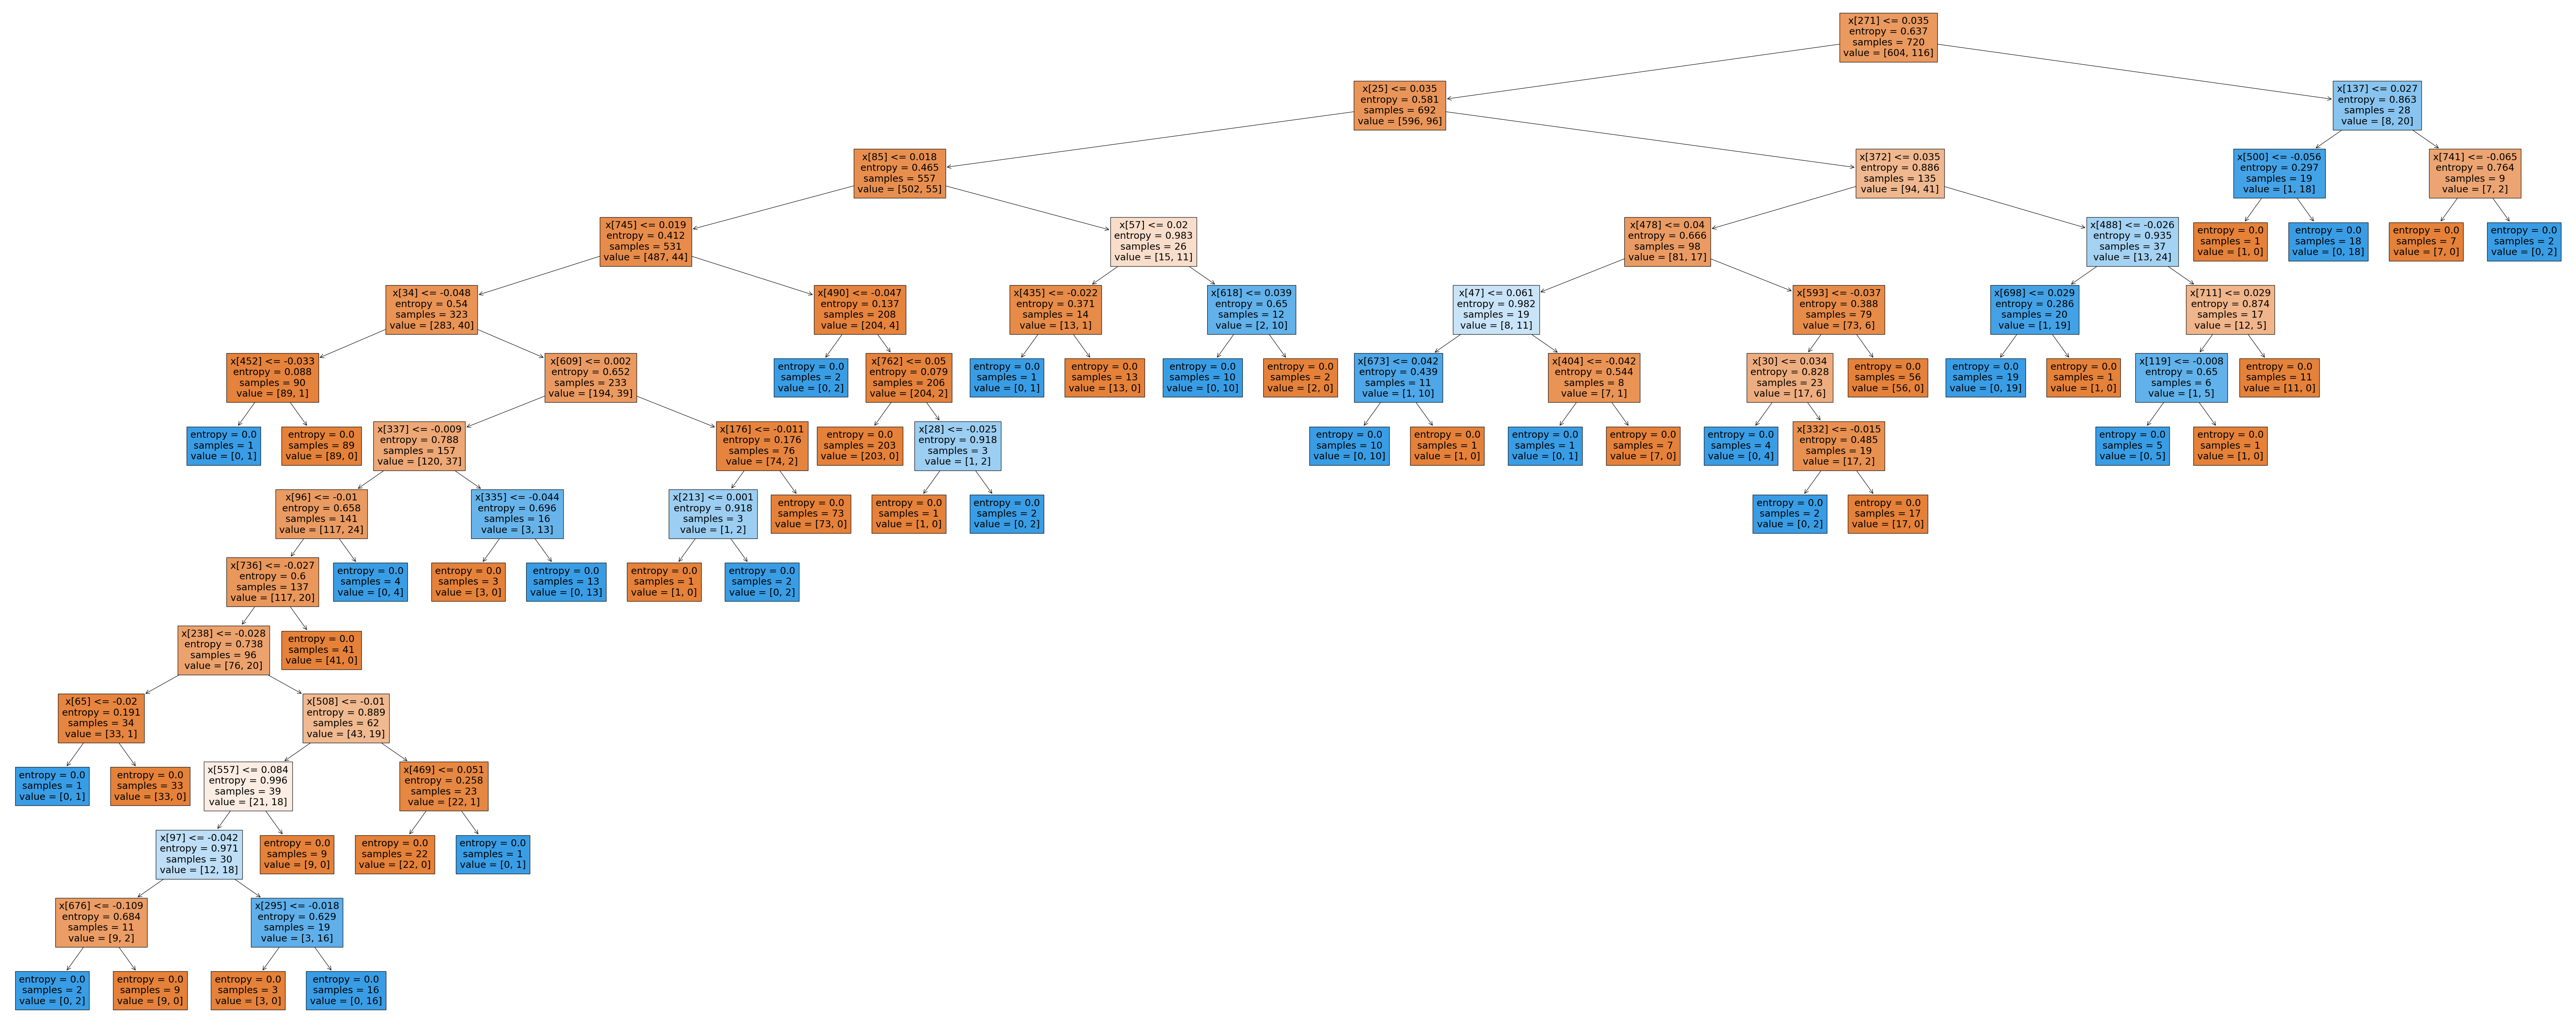

Tree Depth :14
Accuracy on the train data : 100.0 % 
Accuracy on the test data : 72.77777777777777 % 
Confusion Matrix : 
[[122  20]
 [ 29   9]]
Accuracy on the train data : 
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       142
           1       0.31      0.24      0.27        38

    accuracy                           0.73       180
   macro avg       0.56      0.55      0.55       180
weighted avg       0.70      0.73      0.71       180



In [320]:
Decision_Tree_Model_entropy(df1)